In [1]:
from collections import defaultdict
from matplotlib import pyplot as plt
import math
import numpy as np
import operator
import pandas as pd
import pickle


import src.fusiontools as fusiontools
import src.scoring as scoring

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
path_to_data = 'data/'

training = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)

training_info = pd.read_csv(
    path_to_data + 'training_info.csv', sep=',', parse_dates=True, header=0)

test = pd.read_csv(path_to_data + 'test_set.csv', sep=',', header=0)

test_info = pd.read_csv(path_to_data + 'test_info.csv',
                        sep=',', parse_dates=True, header=0)
path_to_results = 'results/'

# Get train-val information
train_info, train_email_ids_per_sender, val_info, val_email_ids_per_sender = scoring.get_train_val(training,
                                                                                                   training_info,
                                                                                                   train_frac=0.95)

Processing training !

Processing val !



# Load best models on validation data

In [24]:
# Load best recency model
recency_rank_dic_path = 'ranks_val/recency-beta-4000-rec-all'
with open(recency_rank_dic_path, 'rb') as infile:
    recency_ranks = pickle.load(infile)
    
# Load best knn model
knn_rank_dic_path = 'ranks_val/knn-k-200-rec-all'
with open(knn_rank_dic_path, 'rb') as infile:
    knn_ranks = pickle.load(infile)

# Load best bayes model
bayes_rank_dic_path = 'ranks_val/bayesian_results_cv'
with open(bayes_rank_dic_path, 'rb') as infile:
    bayes_ranks = pickle.load(infile)


# Load best centroid model
centroid_rank_dic_path = 'ranks_val/centroids_dict'
with open(centroid_rank_dic_path, 'rb') as infile:
    centroid_ranks = pickle.load(infile)

    
# Load best graph_through_words model
words_rank_dic_path = 'ranks_val/through_words_val_318'
with open(words_rank_dic_path, 'rb') as infile:
    words_ranks = pickle.load(infile)


# Load best word2vec model
word2vec_rank_dic_path = 'ranks_val/centroids_w2v_sw0_val'
with open(word2vec_rank_dic_path, 'rb') as infile:
    word2vec_ranks = pickle.load(infile)

# Load best knn model
twidf_rank_dic_path = 'ranks_val/twidf-knn-k-senders-50-rec'
with open(twidf_rank_dic_path, 'rb') as infile:
    twidf_ranks = pickle.load(infile)
    

In [26]:
print(len(twidf_ranks))
for mid, pred in twidf_ranks.items():
    print(len(pred))

2181
39
100
26
36
55
9
47
25
47
54
55
40
32
50
7
67
75
75
73
73
82
73
72
100
77
75
66
83
55
77
72
62
100
48
51
59
51
63
73
76
35
39
30
89
7
100
100
32
63
49
7
1
100
82
74
92
59
72
99
23
64
51
54
78
76
79
70
100
51
100
51
51
100
86
73
51
77
90
51
86
100
87
55
51
97
62
66
73
55
58
51
87
51
51
74
84
74
74
52
74
41
41
60
30
42
32
44
31
7
60
7
81
100
25
1
7
8
87
86
35
1
7
100
100
46
5
100
100
52
100
47
52
42
53
100
100
100
100
100
100
100
98
100
100
17
15
14
13
41
43
100
100
100
60
14
87
45
62
100
26
52
59
60
2
52
52
52
2
63
30
52
52
51
52
31
68
55
52
75
58
55
52
2
7
52
81
100
1
36
28
19
7
100
1
75
1
100
7
50
60
43
53
74
78
100
55
55
66
100
20
100
31
60
100
100
35
36
35
100
100
35
36
100
100
100
100
100
100
100
100
100
39
100
100
100
100
100
52
100
53
63
81
72
40
100
100
100
100
100
94
37
100
100
68
66
100
26
33
31
30
32
28
31
30
36
29
32
30
32
23
33
33
28
33
29
50
72
31
43
1
100
1
87
41
1
7
49
54
32
30
31
30
28
33
32
30
32
28
30
33
33
33
35
30
33
29
33
33
33
33
28
33
32
33
35
30
30
31
33
3

In [27]:
nb_kept_recips = 100
knn_ranks_cropped = fusiontools.keep_only_max_recips(knn_ranks, nb_kept_recips)
recency_ranks_cropped = fusiontools.keep_only_max_recips(recency_ranks, nb_kept_recips)
bayes_ranks_cropped = fusiontools.keep_only_max_recips(bayes_ranks, nb_kept_recips)
centroid_ranks_cropped =fusiontools.keep_only_max_recips(centroid_ranks, nb_kept_recips)
words_ranks_cropped = fusiontools.keep_only_max_recips(words_ranks, nb_kept_recips)
word2vec_ranks_cropped = fusiontools.keep_only_max_recips(word2vec_ranks, nb_kept_recips)
twidf_ranks_cropped = fusiontools.keep_only_max_recips(twidf_ranks, nb_kept_recips)

In [9]:
val_info

,mid,date,body,recipients,parsed_date,time_rank
22323,190751,2001-10-25 10:44:21,Who should go to the fundraiser on my behalf w...,richard.shapiro@enron.com,2001-10-25 10:44:21,2181.0
4873,41554,2001-10-25 10:45:52,--------------------------Sent from my BlackBe...,connie.hook@enron.com,2001-10-25 10:45:52,2180.0
1749,28352,2001-10-25 10:57:50,Anytime.,paul.miller@enron.com,2001-10-25 10:57:50,2179.0
38763,365329,2001-10-25 11:02:15,-----Original Message-----From: \tChuck carso...,hhill@houston.rr.com,2001-10-25 11:02:15,2178.0
8424,79942,2001-10-25 11:05:11,"Jeff,Ellen Su and I are working on it for toda...",gary.hickerson@enron.com a..price@enron.com je...,2001-10-25 11:05:11,2177.0
43602,404466,2001-10-25 11:06:34,"If you work in West Power Trading, congratulat...",john.anderson@enron.com caroline.emmert@enron....,2001-10-25 11:06:34,2175.5
29253,269206,2001-10-25 11:06:34,X-FileName: holden salisbury 6-26-02.PSTIf you...,john.anderson@enron.com caroline.emmert@enron....,2001-10-25 11:06:34,2175.5
23811,205129,2001-10-25 11:08:54,Sue -Received your voice mail. Having AReM on...,susan.mara@enron.com jeff.dasovich@enron.com,2001-10-25 11:08:54,2173.5
5936,49809,2001-10-25 11:08:54,Sue -Received your voice mail. Having AReM on...,susan.mara@enron.com jeff.dasovich@enron.com,2001-10-25 11:08:54,2173.5
5935,49808,2001-10-25 11:18:21,FYI. You may want to send out to RTO team.Jim...,janel.guerrero@enron.com,2001-10-25 11:18:21,2172.0


In [12]:
# print(words_ranks)

In [28]:
# Knn 
knn_score = scoring.compute_prediction_mad(knn_ranks_cropped, val_info)
# Recency
recency_score = scoring.compute_prediction_mad(recency_ranks_cropped, val_info)
# Bayes
bayes_score = scoring.compute_prediction_mad(bayes_ranks_cropped, val_info)
# Tfidf centroids
centroid_score = scoring.compute_prediction_mad(centroid_ranks_cropped, val_info)
# Through words
words_score = scoring.compute_prediction_mad(words_ranks_cropped, val_info)
# word2vec
word2vec_score = scoring.compute_prediction_mad(word2vec_ranks_cropped, val_info)
# twidf
twidf_score = scoring.compute_prediction_mad(twidf_ranks_cropped, val_info)

print(knn_score)
print(recency_score)
print(bayes_score)
print(centroid_score)
print(words_score)
print(word2vec_score)
print(twidf_score)

0.222430995909
0.342123280706
0.330569336273
0.24753857642
0.318334092888
0.123168672873
0.290101495121


In [30]:
# Fuse models
ranking_coeffs = range(15,20) 
# weights = [knn_score/2, recency_score, bayes_score/2, centroid_score, words_score/2]
# models = [knn_ranks_cropped, recency_ranks_cropped, bayes_ranks_cropped, centroid_ranks_cropped, words_ranks_cropped]
weights = [knn_score, recency_score, bayes_score, centroid_score, twidf_score]
models = [knn_ranks_cropped, recency_ranks_cropped, bayes_ranks_cropped, centroid_ranks_cropped, twidf_ranks_cropped]


scores = []
for reranking_coeff in ranking_coeffs:
    fusion_dic = fusiontools.reciprocal_rerank(models, reranking_coeff, weights=weights)
    current_score = scoring.compute_prediction_mad(fusion_dic, val_info)
    scores.append(current_score)
    print(reranking_coeff, scores[-1])

15 0.38636600348
16 0.386000260617
17 0.38563906555
18 0.385264655967


KeyboardInterrupt: 

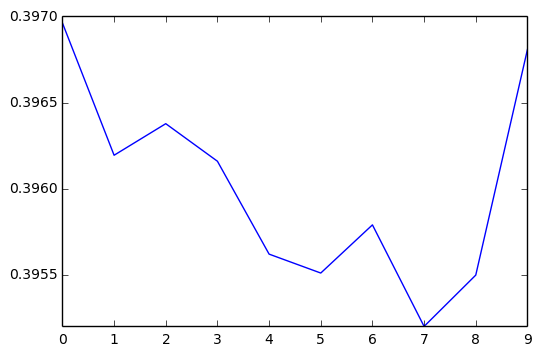

In [50]:
plt.plot(scores)

In [ ]:
# Fuse models
ranking_coeffs = [15] 
weights = [knn_score, recency_score, bayes_score, centroid_score, words_score]
models = [knn_ranks_cropped, recency_ranks_cropped, bayes_ranks_cropped, centroid_ranks_cropped, twidf_ranks_cropped]
ratios = [0, 0.5, 1]
scores = []
for reranking_coeff in ranking_coeffs:
    for w1 in ratios[:]:
        for w2 in ratios[:]:
            for w3 in ratios[:]:
                for w4 in ratios[:]:
                    for w5 in ratios[:]:
                        weights = [w1*knn_score, w2*recency_score, w3*bayes_score, w4*centroid_score, w5*twidf_score]
                        fusion_dic = fusiontools.reciprocal_rerank2(models, reranking_coeff, weights=weights)
                        current_score = scoring.compute_prediction_mad(fusion_dic, val_info)
                        scores.append((w1, w2, w3, w4, w5, current_score))
                        # print(w1, w2, w3, w4, w5)
                        print(scores[-1])


/mnt/d/ALTEGRAD/ALTEGRADExon/src/fusiontools.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  score = 1 / (constant + rank)


(0, 0, 0, 0, 0, 0.2957730563229079)
(0, 0, 0, 0, 0.5, 0.30312301714375361)
(0, 0, 0, 0, 1, 0.30278644984068992)
(0, 0, 0, 0.5, 0, 0.3142347716380352)
(0, 0, 0, 0.5, 0.5, 0.32368184030026842)
(0, 0, 0, 0.5, 1, 0.32291506734216768)
(0, 0, 0, 1, 0, 0.31460477457748259)
(0, 0, 0, 1, 0.5, 0.32491420419357309)
(0, 0, 0, 1, 1, 0.32467135256976093)
(0, 0, 0.5, 0, 0, 0.29481507596585593)
(0, 0, 0.5, 0, 0.5, 0.30099975022783748)
(0, 0, 0.5, 0, 1, 0.30059050697987344)
(0, 0, 0.5, 0.5, 0, 0.31182457633315691)
(0, 0, 0.5, 0.5, 0.5, 0.31751748563979743)
(0, 0, 0.5, 0.5, 1, 0.31786950915676271)
(0, 0, 0.5, 1, 0, 0.31375734226477114)
(0, 0, 0.5, 1, 0.5, 0.32044700090880851)
(0, 0, 0.5, 1, 1, 0.32062272761771676)
(0, 0, 1, 0, 0, 0.29484510580855361)
(0, 0, 1, 0, 0.5, 0.29998067836080378)
(0, 0, 1, 0, 1, 0.29856710943500803)
(0, 0, 1, 0.5, 0, 0.31019616652509491)
(0, 0, 1, 0.5, 0.5, 0.31657304448771884)
(0, 0, 1, 0.5, 1, 0.31604716267949601)
(0, 0, 1, 1, 0, 0.31346738850922712)
(0, 0, 1, 1, 0.5, 0.32031

In [ ]:
print(sorted(scores, key=lambda x:x[5], reverse=True)[:10])

In [41]:
# Fuse models
# ranking_coeffs = [5, 10, 20, 30, 50, 70]
ranking_coeffs = [10] 
weights = [knn_score, 3*recency_score/3, bayes_score, 0*words_score/3]
models = [knn_ranks_cropped, recency_ranks_cropped, bayes_ranks_cropped, words_ranks_cropped]
ratios = [0.4, 0.6, 0.8]
scores = []
for reranking_coeff in ranking_coeffs:
    for w1 in ratios[:]:
        for w2 in ratios[:]:
            for w3 in ratios[:]:
                if w1==w2 and w2==w3: continue
                weights = [w1*knn_score, (1.2-w2)*recency_score, w3*bayes_score, w2*words_score]
                fusion_dic = fusiontools.reciprocal_rerank(models, reranking_coeff, weights=weights)
                current_score = scoring.compute_prediction_mad(fusion_dic, val_info)
                scores.append((w1, w2, w3, current_score))
                print(scores[-1])

(0.4, 0.4, 0.6, 0.37385227604720628)
(0.4, 0.4, 0.8, 0.37378985654410862)
(0.4, 0.6, 0.4, 0.36368717357202868)
(0.4, 0.6, 0.6, 0.36898573354316677)
(0.4, 0.6, 0.8, 0.37078706288499746)
(0.4, 0.8, 0.4, 0.35116490764798114)
(0.4, 0.8, 0.6, 0.35872396828804715)
(0.4, 0.8, 0.8, 0.36182045943175617)
(0.6, 0.4, 0.4, 0.37293262814321304)
(0.6, 0.4, 0.6, 0.37659692684790386)
(0.6, 0.4, 0.8, 0.37766462926977978)
(0.6, 0.6, 0.4, 0.36601819707963679)
(0.6, 0.6, 0.8, 0.37457232614546315)
(0.6, 0.8, 0.4, 0.3553653186103351)
(0.6, 0.8, 0.6, 0.3602787918409166)
(0.6, 0.8, 0.8, 0.36619396913077729)
(0.8, 0.4, 0.4, 0.37522478844816237)
(0.8, 0.4, 0.6, 0.37769959015242954)
(0.8, 0.4, 0.8, 0.38068277459573502)
(0.8, 0.6, 0.4, 0.36580420123795271)
(0.8, 0.6, 0.6, 0.37058140986963506)
(0.8, 0.6, 0.8, 0.37506444531894306)
(0.8, 0.8, 0.4, 0.35672138867604031)
(0.8, 0.8, 0.6, 0.36214630322470487)


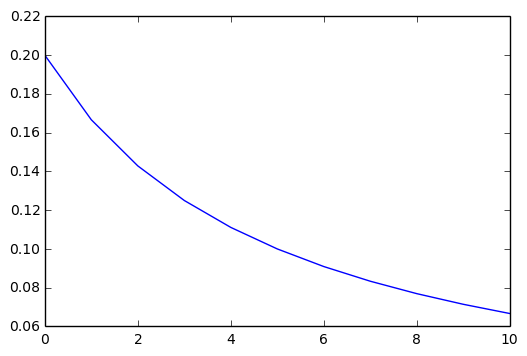

In [62]:
in_ = np.linspace(0,10,11)
constant_ = 5
out_ = [1 / (constant_ + rank) for rank in in_]
plt.plot(out_)

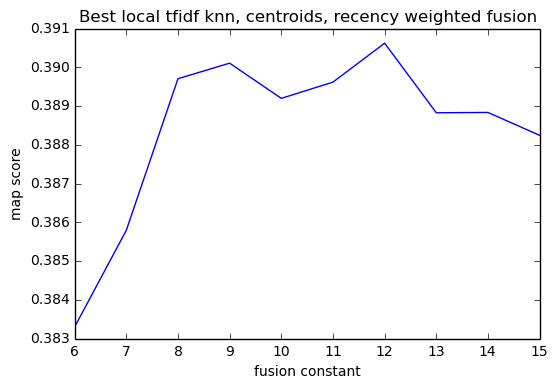

In [28]:
plt.plot(ranking_coeffs, scores)
plt.title('Best local tfidf knn, centroids, recency weighted fusion')
plt.xlabel('fusion constant')
plt.ylabel('map score')
plt.show()